# Investigating The Movie Database Dataset (TMDB)

## Introduction

In this project we are gonna investigate on a **TMDB** dataset.**TMDB** dataset contains info about 10,000 movies.
We are gonna follow all the steps in data analysis like Posing questions,data wrangling,data exploring etc.

So,Lets get started with Posing questions.

## Asking Questions

The following are the questions that we are gonna ask before exploring on our data set.

1. What kinds of properties are associated with movies that have high revenues?

## Data wrangling

In [242]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [243]:
# Load the dataset

data = pd.read_csv("tmdb-movies.csv")

In [244]:
#Lets see how our data looks

data.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [245]:
data.shape

(10866, 21)

Hmmm,we see that there are some columns which wont affect our question from answering even if we remove them.So,lets just remove those columns first.

In [246]:
unnecessary_columns = ['imdb_id','original_title','homepage','tagline','overview','keywords','cast','production_companies','revenue_adj','budget_adj']
data.drop(unnecessary_columns,axis = 1,inplace = True)

In [247]:
data.head(1)

,id,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


Well,you may ask, why did we remove cast as it could be a parameter which could affect revenue.Yeah,but the number of movies an actor acted is very less compared to number of movies we are investigating on,so it wont actually have a vast affect.



Also in the above cells output,if you observe we have many gernes for a single movie.It would be more useful if we just made diffent data lines for each genre seperatley.So,lets do that now.

In [248]:
columns_to_be_split = ['genres']

for column in columns_to_be_split:
    
    df = data[column].str.split('|', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:column}).join(data.drop(column,axis = 1), how='left')
    data = df



In [249]:
data.shape

(26960, 11)

In [250]:
data.head(3) # great, it worked

,genres,id,popularity,budget,revenue,director,runtime,release_date,vote_count,vote_average,release_year
0,Action,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
0,Adventure,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
0,Science Fiction,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015


Now,lets see some properties of our dataset,like mean,median and also if there are any missing values,duplicates etc.

In [251]:
sum(data.duplicated()) #We found duplicates.Remove it.

5

In [252]:
# Remove duplicates

data.drop_duplicates(inplace=True)

In [253]:
data.shape #Done.

(26955, 11)

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 11 columns):
genres          26955 non-null object
id              26955 non-null int64
popularity      26955 non-null float64
budget          26955 non-null int64
revenue         26955 non-null int64
director        26864 non-null object
runtime         26955 non-null int64
release_date    26955 non-null object
vote_count      26955 non-null int64
vote_average    26955 non-null float64
release_year    26955 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


Lets just remove the rows with missing values as cant fill in directors for those movies.

In [255]:
#drop the rows with missing values

data.dropna(inplace=True)

In [256]:
data.info() #Lets confirm if they are removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26864 entries, 0 to 10865
Data columns (total 11 columns):
genres          26864 non-null object
id              26864 non-null int64
popularity      26864 non-null float64
budget          26864 non-null int64
revenue         26864 non-null int64
director        26864 non-null object
runtime         26864 non-null int64
release_date    26864 non-null object
vote_count      26864 non-null int64
vote_average    26864 non-null float64
release_year    26864 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


In [257]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,26864.000000,26864.000000,2.686400e+04,2.686400e+04,26864.000000,26864.000000,26864.000000,26864.000000
mean,58440.024903,0.707988,1.756557e+07,4.760272e+07,102.841758,250.782720,5.954370,2000.675886
std,86513.358901,1.116378,3.465316e+07,1.324054e+08,29.800772,638.957858,0.911253,12.770128
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10192.000000,0.225678,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,18129.000000,0.412474,5.000000e+03,0.000000e+00,100.000000,44.000000,6.000000,2005.000000
75%,57961.000000,0.777600,2.000000e+07,3.092569e+07,112.000000,174.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Oh boy! We can see that minimum values for budget,revenue,runtime is 0.That means there might me more too.Lets check how many of them are present.

Also lets check datatypes of our column as we will now work with queries.

In [258]:
df.dtypes

genres           object
id                int64
popularity      float64
budget            int64
revenue           int64
director         object
runtime           int64
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
dtype: object

We can see that datatypes are appropriate.So,its cool.

In [259]:
#Lets see how many values are zeroes for a respective column.

columns_to_be_verified = ["budget","revenue","runtime"]

for column in columns_to_be_verified:
    print(str(column) + " :"  + str(sum(data[column] == 0.0)))

budget :13274
revenue :14204
runtime :55


Okay.We have quite a lot of cells with missing values.We can actually set them to mean value for that column but that would be wrong.

Because there are different genres of a movie and each genres budget,runtime would be different.

So, instead what we could do is,we can fix those values with mean value of the movies of same genre.This would be smart way of doing it.So,lets get to it.

Also dont forget to exclude values with value = 0 while claculating mean.

In [260]:
import numpy as np #Setting a new index which will make us convinient while applying function

data["index"] = np.arange(data.shape[0])
data.set_index("index",inplace=True)

In [261]:
data.head()

,genres,id,popularity,budget,revenue,director,runtime,release_date,vote_count,vote_average,release_year
index,,,,,,,,,,,
0,Action,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,Adventure,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
2,Science Fiction,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
3,Thriller,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
4,Action,76341,28.419936,150000000,378436354,George Miller,120,5/13/15,6185,7.1,2015


In [262]:
data_copy = data

In [263]:
#Lets define our function to fill the zero values in required columns.

column_in_action = ""  # This will keep track which column values are we filling in.

def feed_zero_cells(row):
    
    if row[column_in_action] == 0:
        return data_copy[data_copy[column_in_action]!= 0].groupby("genres").mean().loc[row["genres"]][column_in_action]  # We excluded rows with  values 0 while calculating mean which is important.
    else:
        return row[column_in_action]
        

In [264]:
# Lets store this as new column

columns_to_be_corrected = ['budget','revenue','runtime']

for column in columns_to_be_corrected:
    
    column_in_action = column
    
    data[column + "_new"] = data.apply(feed_zero_cells,axis = 1)

In [267]:
#Lets drop old columns

data = data.drop(columns_to_be_corrected,axis = 1)

In [269]:
# Lets see if we fixed the issue.

data.describe()  #We did it.

,id,popularity,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new
count,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,2.686400e+04,2.686400e+04,26864.000000
mean,58440.024903,0.707988,250.782720,5.954370,2000.675886,3.355211e+07,9.841247e+07,103.050659
std,86513.358901,1.116378,638.957858,0.911253,12.770128,3.174768e+07,1.280499e+08,29.435808
min,5.000000,0.000188,10.000000,1.500000,1960.000000,1.000000e+00,2.000000e+00,2.000000
25%,10192.000000,0.225678,18.000000,5.400000,1994.000000,1.332396e+07,3.356114e+07,90.000000
50%,18129.000000,0.412474,44.000000,6.000000,2005.000000,2.800000e+07,6.974162e+07,100.000000
75%,57961.000000,0.777600,174.000000,6.600000,2011.000000,4.378235e+07,1.337187e+08,112.000000
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.781506e+09,900.000000


In [275]:
#Month could be a useful parameter.So,lets make a column for it.

data['release_month'] = data['release_date'].apply(lambda x : x.strip('/')[0])

In [278]:
data.head(1)

,genres,id,popularity,director,release_date,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new,release_month
index,,,,,,,,,,,,
0,Action,135397,32.985763,Colin Trevorrow,6/9/15,5562,6.5,2015,150000000.0,1.513529e+09,124.0,6


Now that our dataset is clean, we can jump to exploration.

# Exploration

## Research question 1

In [273]:
data.head(1)

,genres,id,popularity,director,release_date,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new
index,,,,,,,,,,,
0,Action,135397,32.985763,Colin Trevorrow,6/9/15,5562,6.5,2015,150000000.0,1.513529e+09,124.0


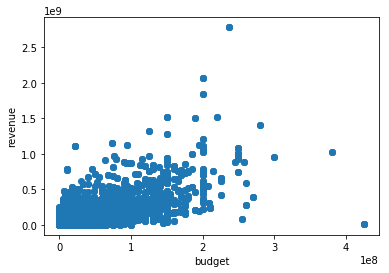

In [279]:
# Lets see how budget is related to revenue

plt.scatter(data["budget_new"],data["revenue_new"])
plt.xlabel("budget")
plt.ylabel("revenue")

We see that there a kind of correlation between budget and revenue and it is a positive correlation.Lets try another one.

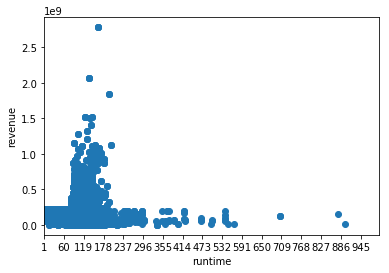

In [293]:
# Lets see how runtime is affecting the revenue.
plt.scatter(data["runtime_new"],data["revenue_new"])
plt.xlim(1,1000)
plt.xticks(np.arange(1,1000,59))
plt.xlabel("runtime")
plt.ylabel("revenue")

Hmm,seems like people are not liking very short or very long movies.They are just going for an optimum range of [70,180].

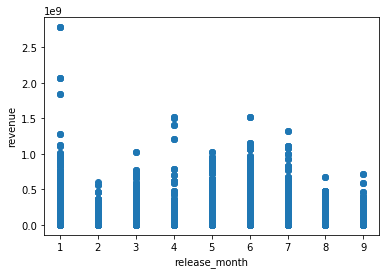

In [294]:
#Lets see if release month is gonna affect revenue.

plt.scatter(data["release_month"],data["revenue_new"])
plt.xlabel("release_month")
plt.ylabel("revenue")

Hmm,seems like february,august and november are pretty bad months to release movies.The top 3 months giving us best revenues are January,June,July.

In [302]:
#Lets see how genre is gonna affect revenue.

data_grouped_by_genre = data.groupby("genres").mean()

In [305]:
data_grouped_by_genre.head()

,id,popularity,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new
genres,,,,,,,,
Action,52557.772498,0.928310,393.929352,5.786039,2000.039950,4.629070e+07,1.377323e+08,105.133838
Adventure,48400.940655,1.157736,514.793315,5.936426,1999.364256,6.095670e+07,1.974209e+08,106.440273
Animation,68362.687861,0.858912,305.835260,6.402312,2003.986994,6.226418e+07,2.219578e+08,68.349711
Comedy,53236.344791,0.593915,176.910100,5.902988,2000.788736,2.901600e+07,8.041019e+07,97.059650
Crime,47715.896526,0.745331,279.002956,6.124982,1999.483370,2.906049e+07,7.421367e+07,107.005917


([<matplotlib.axis.XTick at 0x117385e80>,
 <a list of 20 Text xticklabel objects>)

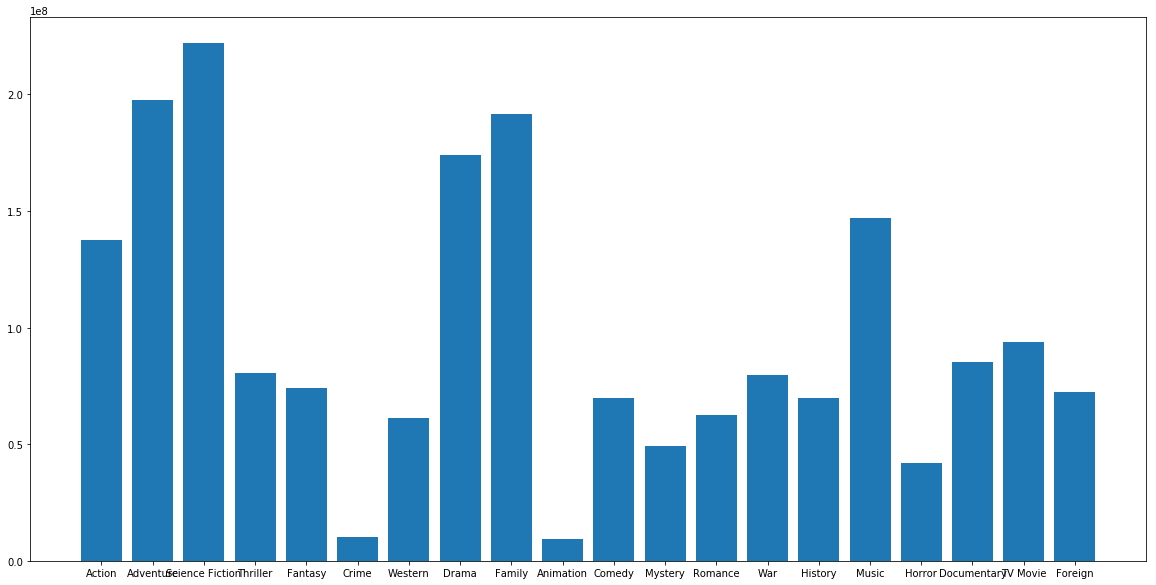

In [307]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(20),data_grouped_by_genre["revenue_new"])
plt.xticks(np.arange(20),data['genres'].unique())

Seems like,people are liking family movies than any other one.

# Conclusions

So,here let me state some conclusions i made from the data i explored.

From the bar graph above where we considered genres,you can see that movies whose genres are Science fiction,Adventure,Family,Drama and action got very high revenues.

**So genre is one of the best property that is assosiated with revenue**

Next if we look at the scatter plot between runtime and revenue,you can clearly see people are not liking very short or very long movies.They go for an optimum one.

**So runtime is one other property that is associated with revenue.**

Also,from the scatter plot between budget and runtime,we can see that theres a positive correlation.The more the budget is the more the revenue is.

**So budget is one other property that is associated with revenue.**

So,these are the three best properties associated with revenue for a movie from the data we explored.